In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import seaborn as sns

import warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

In [88]:
train = pd.read_csv('train_contest.csv')
test = pd.read_csv('test_contest.csv')
train 

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
0,B,A,A,B,A,B,A,A,A,A,...,0.516811,0.512119,0.80058,0.44352,0.63026,0.705501,0.692256,0.516660,0.678592,2730.63
1,A,B,A,A,A,A,A,B,B,A,...,0.499177,0.443760,0.43518,0.66201,0.57716,0.644013,0.630853,0.354344,0.236668,1430.29
2,B,B,A,A,A,B,A,A,B,A,...,0.818056,0.575090,0.66201,0.64681,0.68039,0.863052,0.879347,0.820538,0.714493,2422.54
3,A,A,A,B,A,A,A,A,A,A,...,0.317225,0.485598,0.49462,0.38448,0.34424,0.644013,0.630853,0.206416,0.360832,2910.93
4,A,B,A,A,A,A,A,A,B,B,...,0.380128,0.327516,0.41762,0.43524,0.42284,0.415029,0.406090,0.372852,0.283021,4305.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120089,A,B,A,A,A,A,A,A,B,B,...,0.711174,0.589613,0.56011,0.53565,0.47225,0.492200,0.481306,0.773235,0.280743,2779.32
120090,A,B,A,A,A,A,A,A,B,B,...,0.277229,0.351637,0.26847,0.39447,0.37493,0.453334,0.443374,0.310026,0.382517,698.18
120091,A,B,A,B,B,A,B,B,B,B,...,0.844563,0.530467,0.97973,0.93383,0.83814,0.832976,0.832658,0.810511,0.806941,23583.06
120092,B,B,A,A,A,A,A,A,B,A,...,0.321058,0.326430,0.31280,0.39648,0.38016,0.245410,0.241676,0.261150,0.473558,1304.32


In [89]:
train.describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
count,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000,120094.000000
mean,0.494143,0.507060,0.498852,0.491618,0.487127,0.491324,0.485399,0.487004,0.485809,0.498235,0.494017,0.493655,0.493543,0.495783,3042.230809
std,0.187784,0.207071,0.202241,0.211442,0.208957,0.205297,0.178728,0.199518,0.181637,0.185705,0.209772,0.209459,0.212723,0.222522,2892.180944
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.347403,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.317960,0.358970,0.364580,0.314313,0.314945,0.315758,0.294610,1207.280000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438771,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.408116,2117.245000
75%,0.625272,0.681761,0.634224,0.652072,0.635304,0.654224,0.591284,0.623580,0.568890,0.614590,0.678924,0.682413,0.689974,0.724610,3877.497500
max,0.984975,0.862654,0.944251,0.954297,0.982520,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


<Axes: xlabel='cont5', ylabel='Count'>

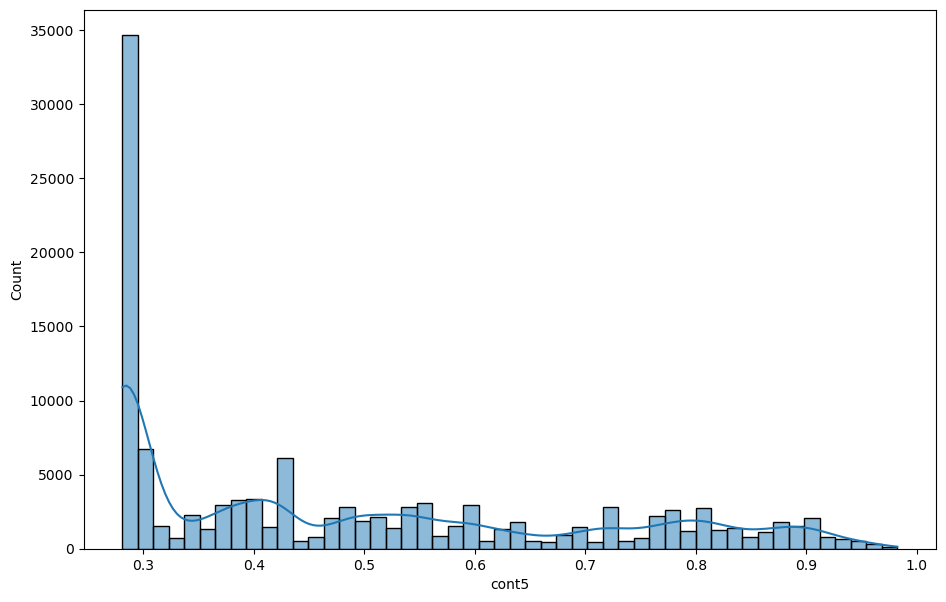

In [90]:
plt.figure(figsize=(11, 7))
sns.histplot(data=train, x='cont5', bins=50, kde=True)

In [91]:
train[np.isclose(train['cont5'], 0.281143, rtol=0.01)]

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,target
3,A,A,A,B,A,A,A,A,A,A,...,0.317225,0.485598,0.49462,0.38448,0.34424,0.644013,0.630853,0.206416,0.360832,2910.93
5,A,B,A,B,A,A,A,A,B,A,...,0.527375,0.743579,0.37194,0.40455,0.47779,0.689039,0.675759,0.310026,0.283811,8368.80
6,A,A,A,A,A,A,A,A,A,A,...,0.432555,0.670250,0.26847,0.41471,0.47779,0.711942,0.698722,0.304350,0.732587,5653.12
14,A,B,A,A,A,A,A,A,B,A,...,0.443265,0.635029,0.36636,0.52938,0.39068,0.661688,0.648446,0.304350,0.677133,1158.06
15,A,A,A,A,A,B,A,A,A,A,...,0.458113,0.370189,0.56600,0.78484,0.47779,0.304315,0.298713,0.592264,0.812235,1155.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120081,B,A,A,A,A,B,A,A,A,A,...,0.748243,0.538694,0.54829,0.50420,0.51111,0.711942,0.698722,0.709578,0.602332,1714.67
120085,A,A,A,A,A,A,A,A,A,A,...,0.907555,0.733960,0.89839,0.81945,0.80914,0.821840,0.810292,0.861364,0.741902,518.56
120087,B,B,A,B,A,B,A,A,A,A,...,0.745352,0.561773,0.87954,0.52100,0.60932,0.727671,0.714544,0.768525,0.794684,2695.93
120088,A,B,A,A,A,B,A,A,B,A,...,0.364464,0.365369,0.24564,0.32865,0.40666,0.245410,0.241676,0.624025,0.784470,562.94


In [92]:
target = train['target']
train = train.drop(columns = 'target')
train

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,B,A,A,B,A,B,A,A,A,A,...,0.594196,0.516811,0.512119,0.80058,0.44352,0.63026,0.705501,0.692256,0.516660,0.678592
1,A,B,A,A,A,A,A,B,B,A,...,0.594196,0.499177,0.443760,0.43518,0.66201,0.57716,0.644013,0.630853,0.354344,0.236668
2,B,B,A,A,A,B,A,A,B,A,...,0.725503,0.818056,0.575090,0.66201,0.64681,0.68039,0.863052,0.879347,0.820538,0.714493
3,A,A,A,B,A,A,A,A,A,A,...,0.281143,0.317225,0.485598,0.49462,0.38448,0.34424,0.644013,0.630853,0.206416,0.360832
4,A,B,A,A,A,A,A,A,B,B,...,0.594196,0.380128,0.327516,0.41762,0.43524,0.42284,0.415029,0.406090,0.372852,0.283021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120089,A,B,A,A,A,A,A,A,B,B,...,0.534484,0.711174,0.589613,0.56011,0.53565,0.47225,0.492200,0.481306,0.773235,0.280743
120090,A,B,A,A,A,A,A,A,B,B,...,0.422268,0.277229,0.351637,0.26847,0.39447,0.37493,0.453334,0.443374,0.310026,0.382517
120091,A,B,A,B,B,A,B,B,B,B,...,0.281143,0.844563,0.530467,0.97973,0.93383,0.83814,0.832976,0.832658,0.810511,0.806941
120092,B,B,A,A,A,A,A,A,B,A,...,0.491114,0.321058,0.326430,0.31280,0.39648,0.38016,0.245410,0.241676,0.261150,0.473558


In [93]:
def target_encoding(train, target, test=None, feat_to_encode=None):
    train = train.copy()
    if test is not None:
        test = test.copy()
    
    train.sort_index(inplace=True)

    if feat_to_encode is None:
        feat_to_encode = train.columns.tolist()
        
    oof_parts = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    for tr_idx, oof_idx in kf.split(train, target):
        encoder = TargetEncoder(smooth="auto")  # новый sklearn TargetEncoder
        encoder.fit(train.iloc[tr_idx][feat_to_encode], target.iloc[tr_idx])
        encoded = encoder.transform(train.iloc[oof_idx][feat_to_encode])
        encoded_df = pd.DataFrame(encoded, columns=feat_to_encode, index=train.iloc[oof_idx].index)
        oof_parts.append(encoded_df)

    if test is not None:
        final_encoder = TargetEncoder(smooth="auto")
        final_encoder.fit(train[feat_to_encode], target)
        test[feat_to_encode] = final_encoder.transform(test[feat_to_encode])
    
    train_encoded = pd.concat(oof_parts).sort_index()
    train[feat_to_encode] = train_encoded[feat_to_encode]
    return train, test

In [94]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

def label_encoding(train, test=None, feat_to_encode=None):
    train = train.copy()
    if test is not None:
        test = test.copy()
    
    # Определяем признаки для кодирования
    if feat_to_encode is None:
        feat_to_encode = train.select_dtypes(include=['object', 'category']).columns.tolist()
    
    for feature in feat_to_encode:
        # Создаем словарь для маппинга
        le = LabelEncoder()
        train_encoded = le.fit_transform(train[feature].astype(str))
        
        # Создаем маппинг для быстрого преобразования
        label_mapping = {val: idx for idx, val in enumerate(le.classes_)}
        
        # Применяем к train
        train[feature] = train_encoded
        
        # Применяем к test если есть
        if test is not None:
            # Векторизованная операция вместо apply
            test[feature] = test[feature].astype(str).map(label_mapping).fillna(-1).astype(int)
    
    return train, test

In [95]:
cat_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

#train_encode, test_encode = target_encoding(train, target, test, cat_cols)
train_encode, test_encode = label_encoding(train, test, cat_cols)


train_encode

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,1,0,0,1,0,1,0,0,0,0,...,0.594196,0.516811,0.512119,0.80058,0.44352,0.63026,0.705501,0.692256,0.516660,0.678592
1,0,1,0,0,0,0,0,1,1,0,...,0.594196,0.499177,0.443760,0.43518,0.66201,0.57716,0.644013,0.630853,0.354344,0.236668
2,1,1,0,0,0,1,0,0,1,0,...,0.725503,0.818056,0.575090,0.66201,0.64681,0.68039,0.863052,0.879347,0.820538,0.714493
3,0,0,0,1,0,0,0,0,0,0,...,0.281143,0.317225,0.485598,0.49462,0.38448,0.34424,0.644013,0.630853,0.206416,0.360832
4,0,1,0,0,0,0,0,0,1,1,...,0.594196,0.380128,0.327516,0.41762,0.43524,0.42284,0.415029,0.406090,0.372852,0.283021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120089,0,1,0,0,0,0,0,0,1,1,...,0.534484,0.711174,0.589613,0.56011,0.53565,0.47225,0.492200,0.481306,0.773235,0.280743
120090,0,1,0,0,0,0,0,0,1,1,...,0.422268,0.277229,0.351637,0.26847,0.39447,0.37493,0.453334,0.443374,0.310026,0.382517
120091,0,1,0,1,1,0,1,1,1,1,...,0.281143,0.844563,0.530467,0.97973,0.93383,0.83814,0.832976,0.832658,0.810511,0.806941
120092,1,1,0,0,0,0,0,0,1,0,...,0.491114,0.321058,0.326430,0.31280,0.39648,0.38016,0.245410,0.241676,0.261150,0.473558


<Figure size 1400x1200 with 0 Axes>

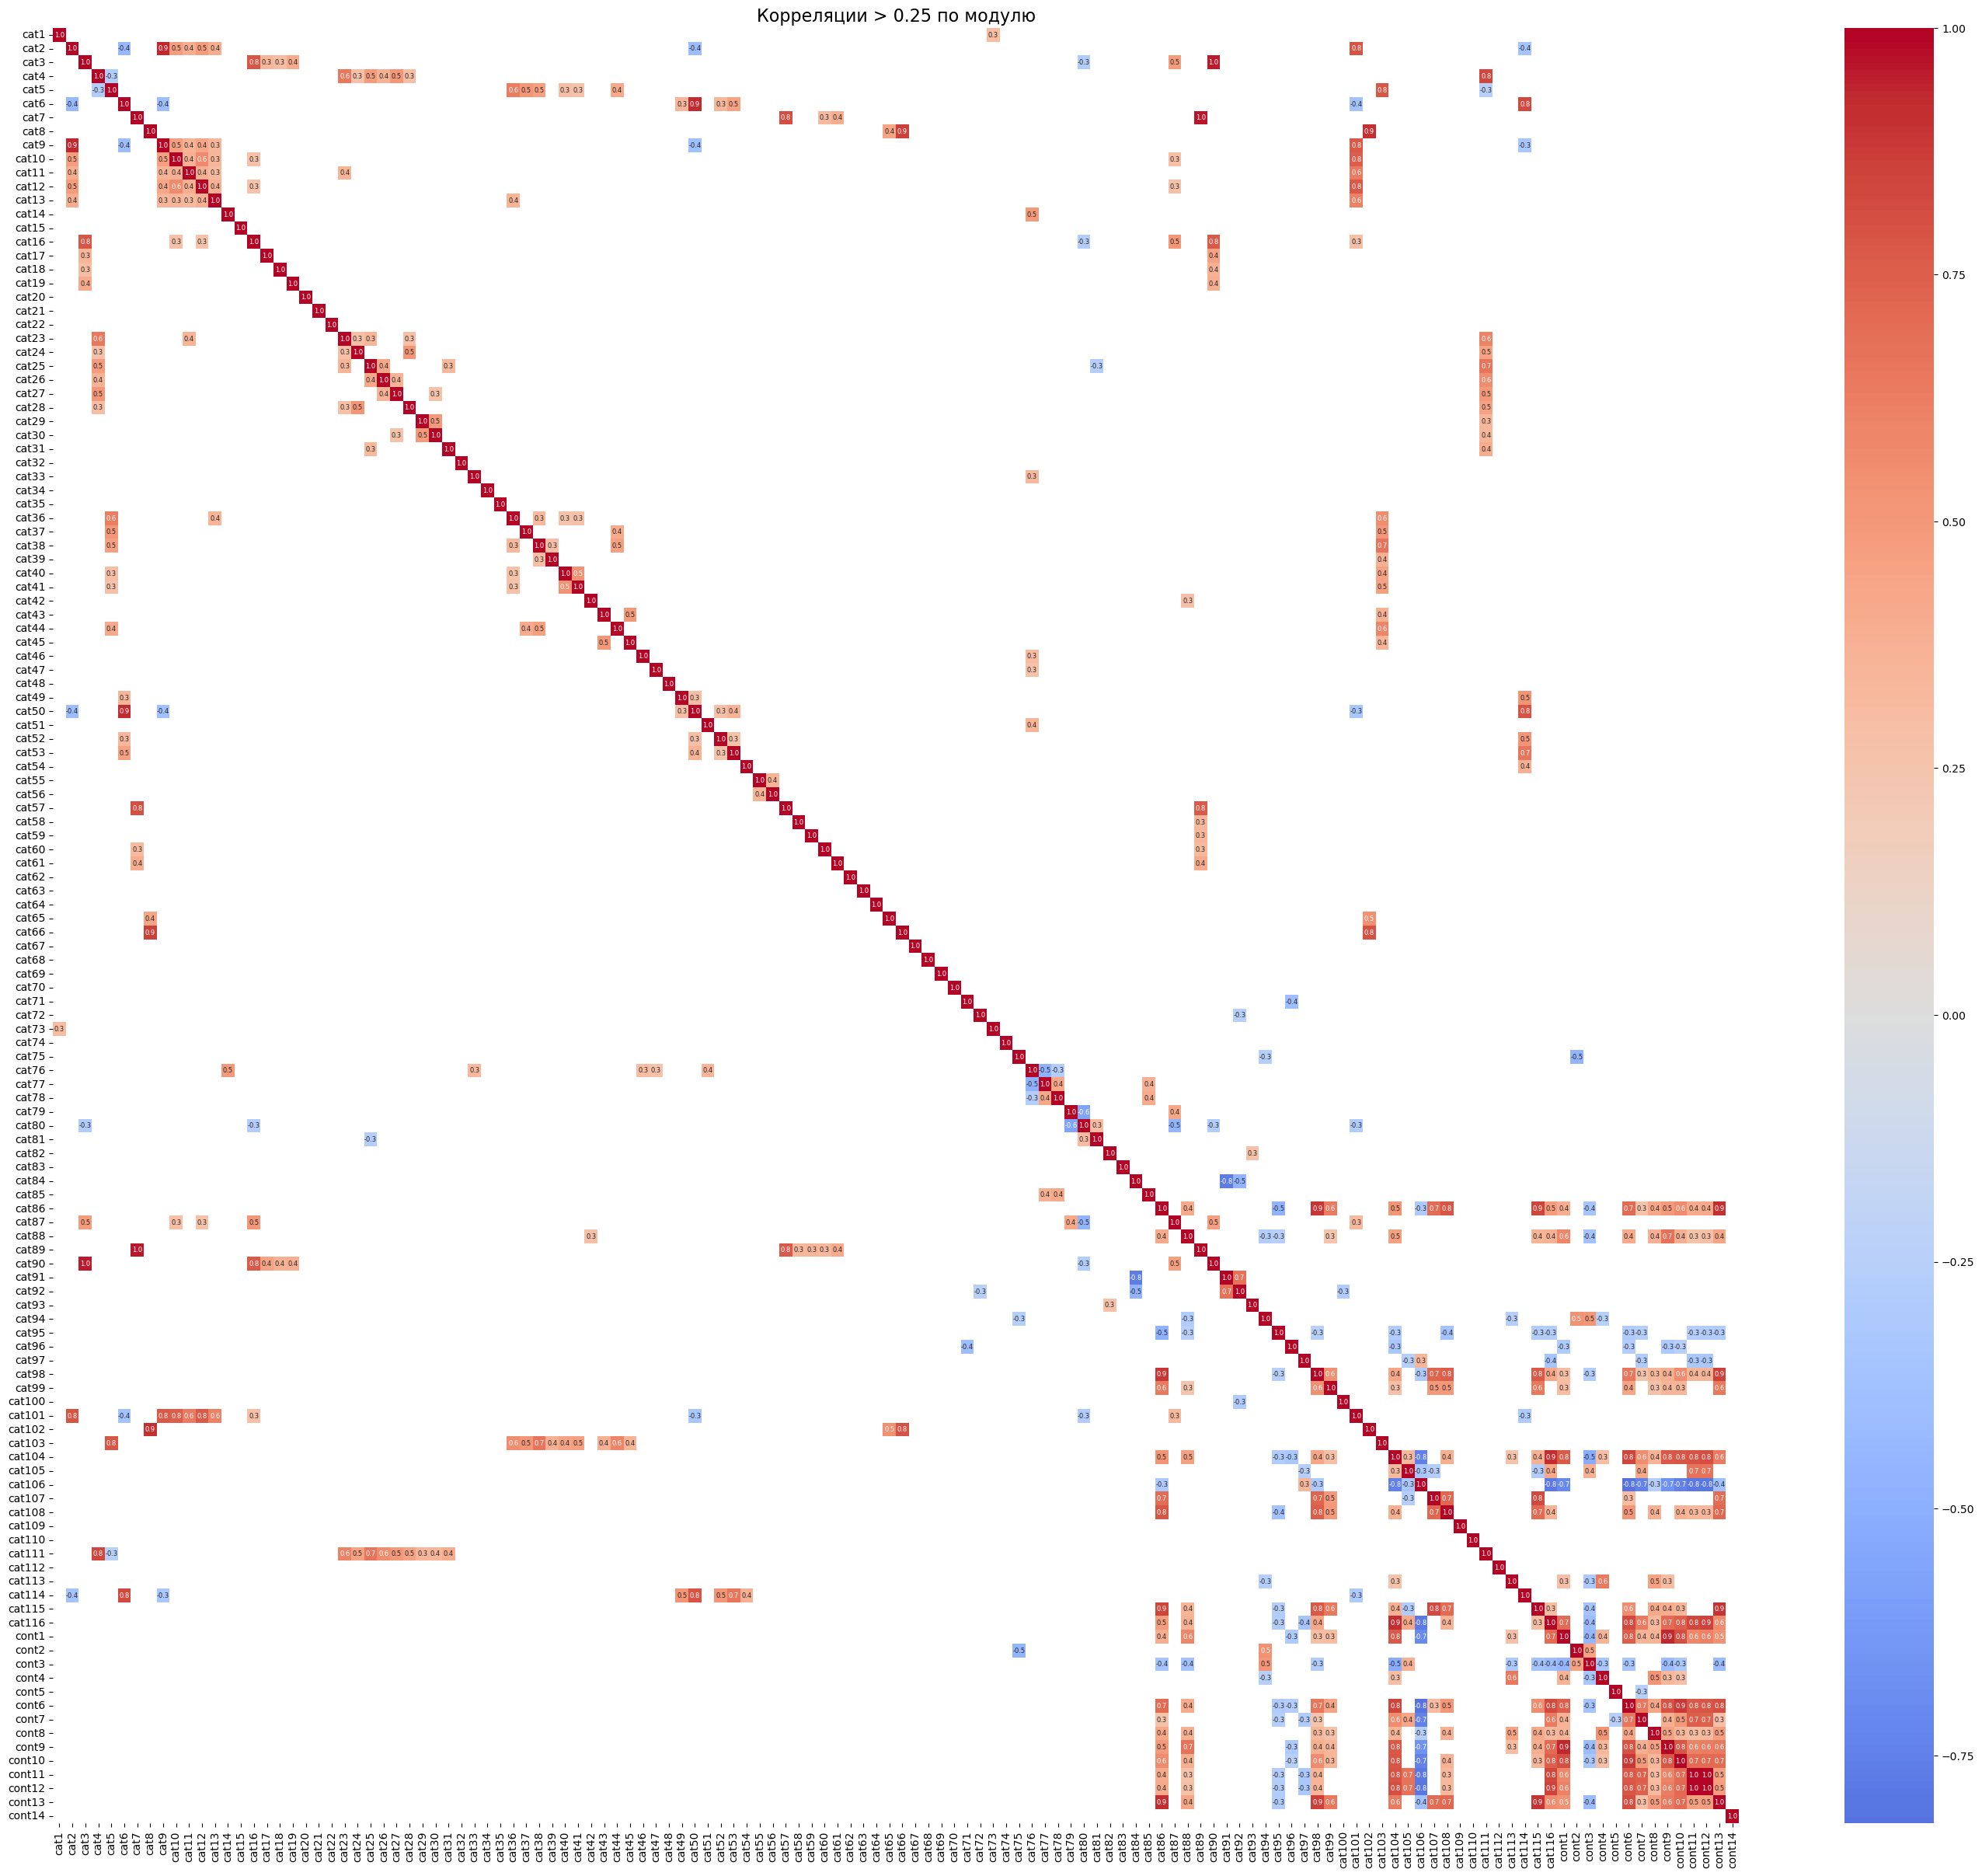

In [96]:
corr_matrix = train_encode.corr()

plt.figure(figsize=(14, 12))
# Фильтруем только значимые корреляции
threshold = 0.25  # Порог корреляции
filtered_corr = corr_matrix.where(np.abs(corr_matrix) > threshold)

plt.figure(figsize=(35, 30))
sns.heatmap(
    filtered_corr,
    cmap='coolwarm',
    center=0,
    annot=True,
    fmt=".1f",
    annot_kws={'size': 6}
)
plt.title(f'Корреляции > {threshold} по модулю', fontsize=16)
plt.show()

In [97]:
#Выкинуть ебаныйе признаки

#cols = list(set(train.columns) - set([  'cat7', 'cat9', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 'cat23', 'cat24', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat36', 'cat39', 'cat42','cat43', 'cat45', 'cat46', 'cat47', 'cat48', 'cat50', 'cat51', 'cat54', 'cat55', 'cat56', 'cat57', 'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat66', 'cat67', 'cat68', 'cat69', 'cat70', 'cat84', 'cat86', 'cat88', 'cat89', 'cat90', 'cat91', 'cat92', 'cat98', 'cat101', 'cat102', 'cat103', 'cat104', 'cat106', 'cat107', 'cat111', 'cat114', 'cat115', 'cat116']))

cols = list(set(train.columns) - set([  'cat7', 'cat14', 'cat15', 'cat16', 'cat17', 'cat18', 'cat19', 'cat20', 'cat21', 'cat22', 
                                        'cat24', 'cat29', 'cat30', 'cat31', 'cat32', 'cat33', 'cat34', 'cat35', 'cat39', 'cat42',
                                        'cat43', 'cat45', 'cat46', 'cat47', 'cat48', 'cat51', 'cat54', 'cat55', 'cat56', 'cat57', 
                                        'cat58', 'cat59', 'cat60', 'cat61', 'cat62', 'cat63', 'cat64', 'cat65', 'cat67', 'cat68', 
                                        'cat69', 'cat70']))

train_encode = train_encode[cols]
test_encode = test_encode[cols + ['index']]

In [98]:
def mean_absolute_percentage_error(y_true, y_pred):
    """Вычисление MAPE с защитой от деления на ноль"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    # Добавляем небольшое значение к y_true чтобы избежать деления на 0
    epsilon = 1e-10
    return 100 * np.mean(np.abs((y_true - y_pred) / (y_true + epsilon)))

In [107]:
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(
    train_encode, 
    target, 
    test_size=0.2,
    random_state=42
)

params = {
    'objective': 'mape',  # Встроенная оптимизация MAPE в LightGBM
    'metric': 'mape',     # Отслеживаем MAPE на валидации
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'verbose': -1
}

# Создаем датасеты LGBM
train_dataset = lgb.Dataset(X_train, label=y_train)
val_dataset = lgb.Dataset(X_val, label=y_val)

# Тренируем модель
model = lgb.train(
    params,
    train_dataset,
    num_boost_round=3000,
    valid_sets=[train_dataset, val_dataset],
    callbacks=[
        lgb.early_stopping(stopping_rounds=50, verbose=True),
        lgb.log_evaluation(50)
    ]
)

val_pred = model.predict(X_val)
print(f"Validation MAPE: {mean_absolute_percentage_error(y_val, val_pred):.2f}%")

rmse = np.sqrt(mean_squared_error(y_val, val_pred))
print(f"Validation RMSE: {rmse:.4f}")


Training until validation scores don't improve for 50 rounds
[50]	training's mape: 0.460222	valid_1's mape: 0.461298
[100]	training's mape: 0.442491	valid_1's mape: 0.446771
[150]	training's mape: 0.434224	valid_1's mape: 0.440098
[200]	training's mape: 0.429349	valid_1's mape: 0.437212
[250]	training's mape: 0.426225	valid_1's mape: 0.435858
[300]	training's mape: 0.424602	valid_1's mape: 0.435312
[350]	training's mape: 0.423166	valid_1's mape: 0.434793
[400]	training's mape: 0.422355	valid_1's mape: 0.434615
[450]	training's mape: 0.421543	valid_1's mape: 0.434419
[500]	training's mape: 0.420764	valid_1's mape: 0.434175
[550]	training's mape: 0.420121	valid_1's mape: 0.434058
[600]	training's mape: 0.419454	valid_1's mape: 0.43389
[650]	training's mape: 0.418795	valid_1's mape: 0.433736
[700]	training's mape: 0.418479	valid_1's mape: 0.433705
[750]	training's mape: 0.418118	valid_1's mape: 0.433692
Early stopping, best iteration is:
[702]	training's mape: 0.418436	valid_1's mape: 0.4

In [ ]:
#test_encode = test_encode.drop(columns='target')

In [109]:
test_cols = list(set(test_encode.columns) - set(['index']))

test_encode['target'] = model.predict(test_encode[test_cols])

In [110]:
test_encode[['index', 'target']].to_csv('res.csv', index=False)

<Axes: xlabel='target', ylabel='Count'>

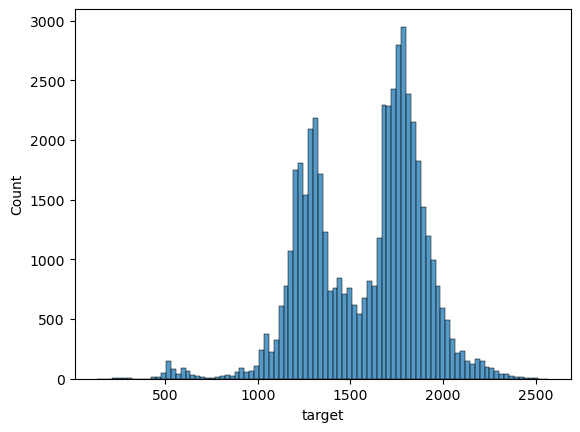

In [111]:
sns.histplot(data=test_encode, x='target')